In [27]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
with open('../config.json', 'r') as fp:
    config = json.load(fp)

In [30]:
label_score_path = config['label_score_path']

In [31]:
df = pd.read_csv(label_score_path)
df = df[df['bcs'].isin([3, 4, 5, 6, 7])]

In [46]:
df2 = df[df['type']=='train']
df2['bcs'].value_counts()

5    159
6     96
4     47
7     26
3      9
Name: bcs, dtype: int64

In [45]:
df1 = df[df['type']=='test']
df1['bcs'].value_counts()

5    25
6    20
4    11
7     4
Name: bcs, dtype: int64

In [35]:
df.head(1)

,cow_regno,bcs,center_x,center_y,center_z,type
0,501330902,4,1.712014e-15,-6.292216e-17,6.018308e-16,train


In [36]:
dftrain, dftest = train_test_split(df, test_size=0.1,
                                    # stratify=df[['bcs']]
                                    )

In [37]:
df['bcs'].value_counts()

5    184
6    116
4     58
7     30
3      9
Name: bcs, dtype: int64

<AxesSubplot: ylabel='Frequency'>

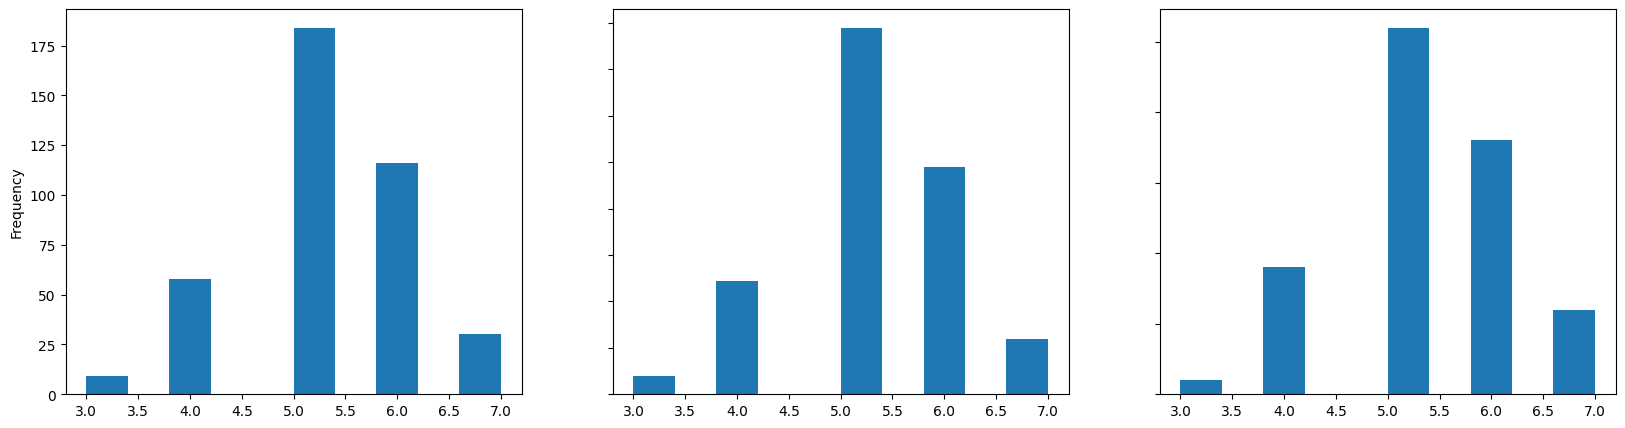

In [51]:
dftrain, dftest = train_test_split(df, test_size=0.15)
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1)
df['bcs'].plot(kind='hist', bins=10, sharey=ax1)
ax2 = plt.subplot(1, 3, 2)
dftrain['bcs'].plot(kind='hist', bins=10)
ax3 = plt.subplot(1, 3, 3)
dftest['bcs'].plot(kind='hist', bins=10, sharey=ax1)

In [55]:
dftrain['type'] = 'train'
dftest['type'] = 'test'
df = pd.concat([dftrain, dftest], ignore_index=True)
df.to_csv(label_score_path, index=False)

In [53]:
df[df['type']=='test']['bcs'].value_counts()

5    26
6    18
4     9
7     6
3     1
Name: bcs, dtype: int64

In [54]:
df[df['type']=='train']['bcs'].value_counts()

5    158
6     98
4     49
7     24
3      8
Name: bcs, dtype: int64